**What are the first 2 steps to using Pyspark?**

Create a Session and a Context if we have different tasks

**Is PySpark a Python-based wrapper on top of the Scala API?**

Yes

**Are Resilient Distributed Datasets (RDD) an immutable data structure?**

Yes

**Can Spark run on a distributed cluster of computers?**

Yes

**Spark is implemented in C++?**

No, in Scala

**Which transformation operation do you use to eliminate some data from your RDD**

```
# .filter()

```

**Which transformation operation do you use to change the data of your RDD?**
```
# .map()
```

**How to describe a the type of data on your dataset in one line?**
```
# .describe()

```
**How to describe the ‘mathematical’ properties of the dataset?**
```
# .describe().show()

```
**How to read csv files?**
```
# .read.csv()

```
**How to calculate the number of samples inside a dataset?**
```
# .count()
```

**How to create a data frame?**
```
columns = [...]
data = [...]
df = spark.createDataFrame(data).toDF(*columns)
```
**How to replace element in a dataframe conditionally?**

```
dataframe.withColumn(,
    when(...) \
   .otherwise(...)) \
   .show(truncate=False)

```

In [ ]:
!pip install --upgrade pyspark==3.5.4 py4j

In [1]:
import pyspark
print(pyspark.__version__)

3.5.4


In [2]:
from pyspark.sql import SparkSession

from pyspark.sql.functions import *
spark = SparkSession.builder \
    .master("local") \
    .appName("TD") \
    .getOrCreate()

In [3]:
#Depending on the platform you are using, put the folder in the right path
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


#Dataset Description

The dataset includes tables for products, sales orders, and sellers, with information on product details, individual sales, and seller profiles, respectively.

#**Exercises**

##1) Read what is inside the 3 datasets

In [4]:
#Read the content of the three datasets, use the .csv files
print('PRODUCTS')
products = spark.read.csv("/content/gdrive/MyDrive/labsDS/Lab3:SparkSQL, DataFrames, and DataSets /data/products.csv", header=True, mode="DROPMALFORMED")
products.show()
print('SALES')
sales = spark.read.csv("/content/gdrive/MyDrive/labsDS/Lab3:SparkSQL, DataFrames, and DataSets /data/sales.csv", header=True, mode="DROPMALFORMED")
sales.show()
print('SELLERS')
sellers = spark.read.csv("/content/gdrive/MyDrive/labsDS/Lab3:SparkSQL, DataFrames, and DataSets /data/sellers.csv", header=True, mode="DROPMALFORMED")
sellers.show()

PRODUCTS
+----------+------------+-----+
|product_id|product_name|price|
+----------+------------+-----+
|         0|   product_0|   22|
|         1|   product_1|   30|
|         2|   product_2|   91|
|         3|   product_3|   37|
|         4|   product_4|  145|
|         5|   product_5|  128|
|         6|   product_6|   66|
|         7|   product_7|  145|
|         8|   product_8|   51|
|         9|   product_9|   44|
|        10|  product_10|   53|
|        11|  product_11|   13|
|        12|  product_12|  104|
|        13|  product_13|  102|
|        14|  product_14|   24|
|        15|  product_15|   14|
|        16|  product_16|   38|
|        17|  product_17|   72|
|        18|  product_18|   16|
|        19|  product_19|   46|
+----------+------------+-----+
only showing top 20 rows

SALES
+--------+----------+---------+----------+---------------+--------------------+
|order_id|product_id|seller_id|      date|num_pieces_sold|       bill_raw_text|
+--------+----------+---------+

##2) Find out how many orders, products and sellers are in the data.

In [5]:
# Read the source tables in Parquet format -> .parquet()
# Parquet is a columnar storage format that is highly efficient for analytics workloads.
# It's often preferred for its compression and performance advantages over other formats like CSV.

products_table = spark.read.parquet("/content/gdrive/MyDrive/labsDS/Lab3:SparkSQL, DataFrames, and DataSets /data/products_parquet")
sales_table = spark.read.parquet("/content/gdrive/MyDrive/labsDS/Lab3:SparkSQL, DataFrames, and DataSets /data/sales_parquet")
sellers_table = spark.read.parquet("/content/gdrive/MyDrive/labsDS/Lab3:SparkSQL, DataFrames, and DataSets /data/sellers_parquet")

#   Print the number of orders
print("Number of Orders: {}".format(sales_table.count()))

#   Print the number of sellers
print("Number of sellers: {}".format(sellers_table.count()))

#   Print the number of products
print("Number of products: {}".format(products_table.count()))

Number of Orders: 200040
Number of sellers: 10
Number of products: 750000


As you can see, we have 750000 products in our dataset and 200040 orders: since each order can only have a single product, some of them have never been sold.

##3) How many sold products appear at least once

Use the function countDistinct(), it returns the number of distinct elements in a group.
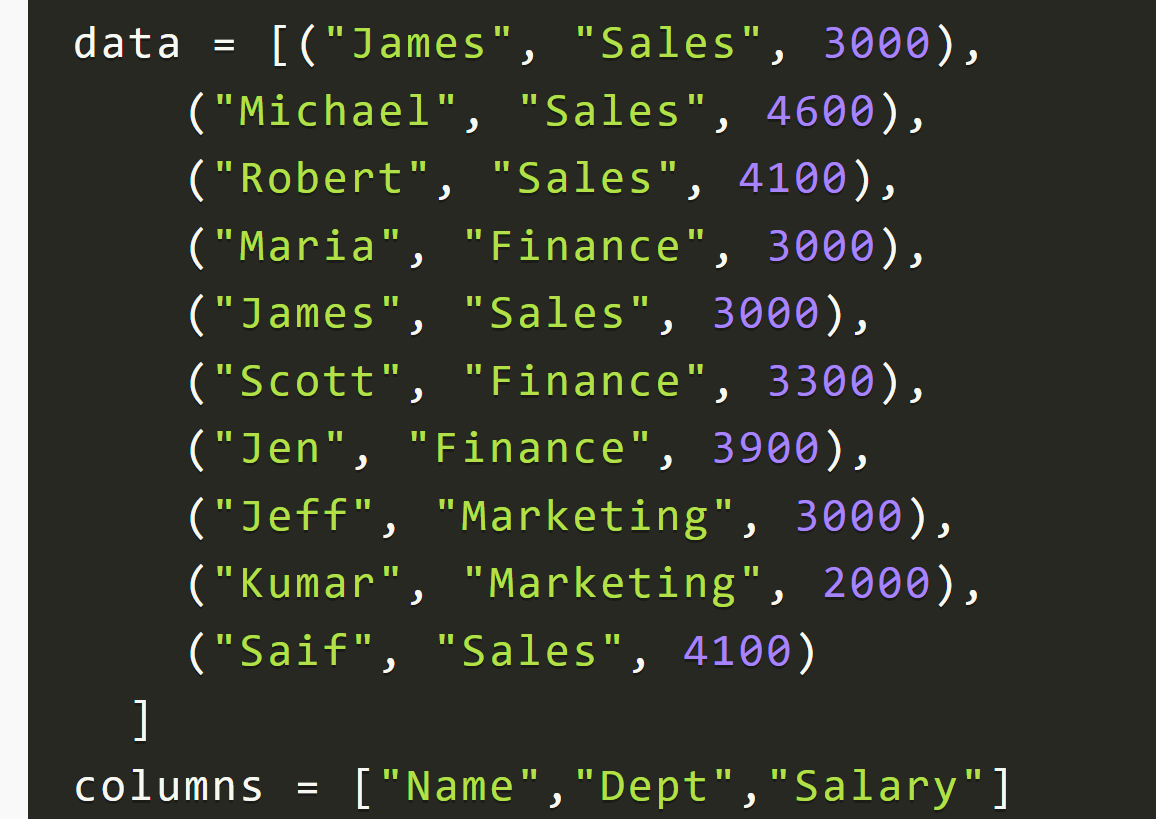

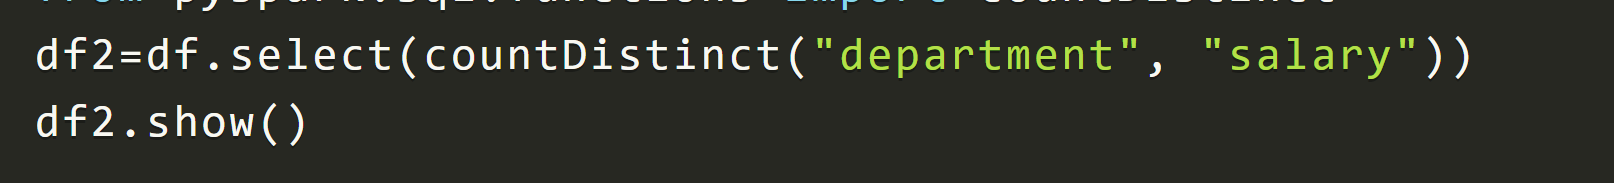

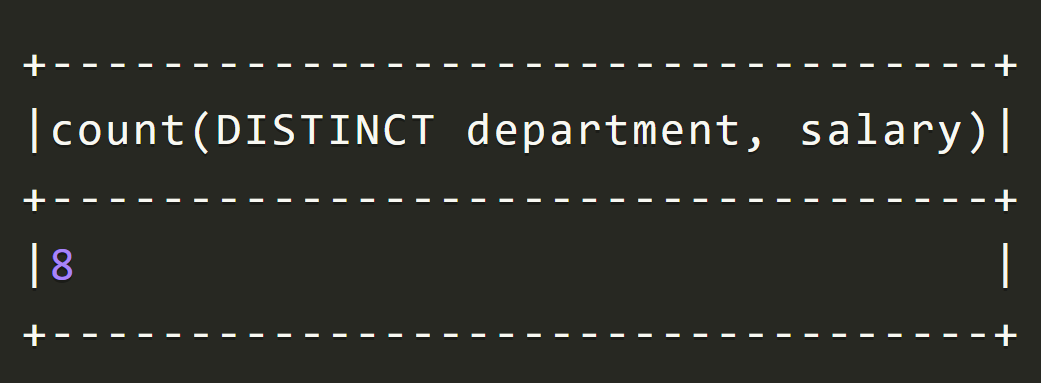

DataFrame object itself doesn't have a countDistinct() attribute or method. Instead, countDistinct is a function provided by PySpark's SQL functions module, and you need to use it within an aggregation operation .agg() to perform calculations on DataFrame columns.


In [7]:
#   Output how many products have been actually sold at least once
print("Number of products sold at least once")
sales_table.agg(countDistinct(col("product_id"))).show()

Number of products sold at least once
+--------------------------+
|count(DISTINCT product_id)|
+--------------------------+
|                      9974|
+--------------------------+



The first block is counting how many distinct products we have in the sales table, while the second block

##4) Which is the product contained in more orders?

Use the function groupBy(), it is used to group large amounts of data and compute operations on these groups.

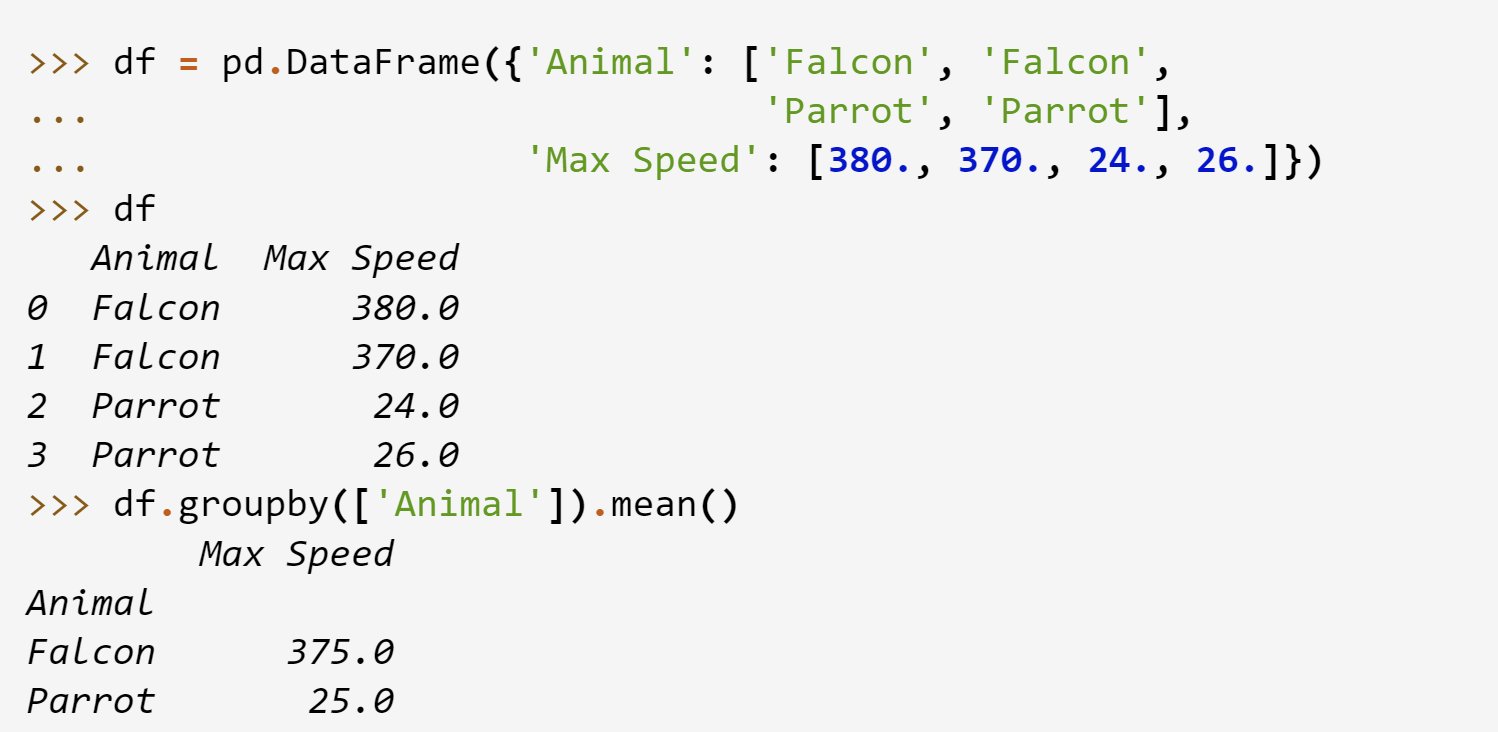

Then use orderBy(), which is used to sort on one or more columns. By default, it orders by ascending.
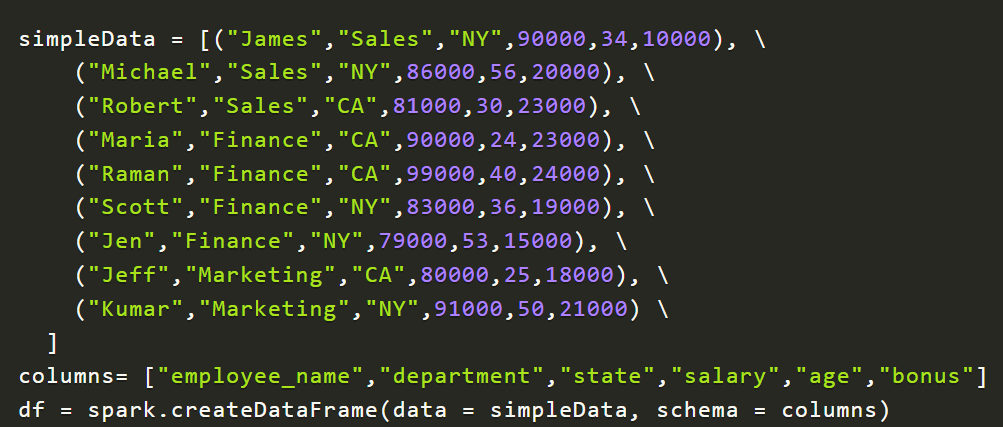

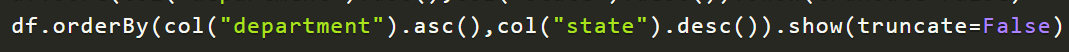

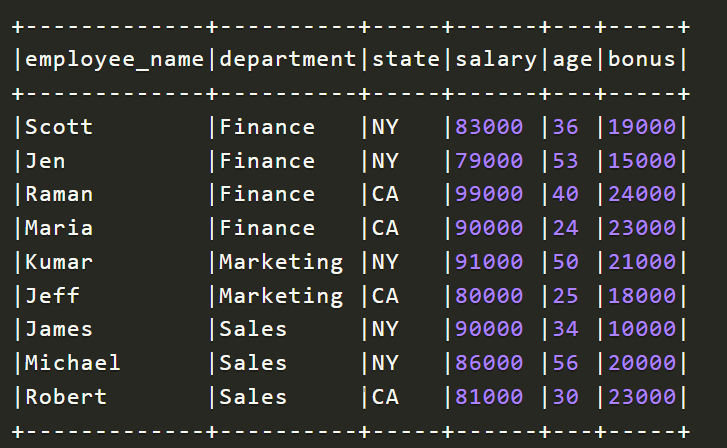

Step to do the task:
1.   Grouping by Product ID
2.   Aggregating Counts and create an Alias: .alias("...").
    An alias is a temporary name given to a column or an expression, used primarily to make the code more readable, easier to reference, and avoid ambiguity in the context of complex operations. In Spark, using an alias is necessary for the operation to work correctly, such as count(),orderBy ...
3.   Ordering by Count in Descending Order
4.   Limiting to the first result: .limit(1)
5.   Displaying the Result




In [ ]:
#   Output which is the product that has been sold in more orders
print("Product present in more orders")
sales_table.groupBy(col("product_id")).agg(count("*").alias("cnt")).orderBy(col("cnt").desc()).limit(1).show()

Product present in more orders
+----------+------+
|product_id|   cnt|
+----------+------+
|         0|190000|
+----------+------+



The block is pulling the product_id that has the highest count in the sales table.

Let’s have a closer look at the second result: 190000 orders out of 200040 are selling the product with product_id = 0

##5) How many distinct products have been sold each day?

Use the functions previously used.
1.   Grouping by Date
2.   Aggregating Distinct Product IDs + alias creation
3.   Ordering by Distinct Products Sold in Descending Order
4.   Displaying the Result



In [ ]:
sales_table.groupby(col("date")).agg(countDistinct(col("product_id")).alias("distinct_products_sold")).orderBy(
    col("distinct_products_sold").desc()).show()

+----------+----------------------+
|      date|distinct_products_sold|
+----------+----------------------+
|2020-07-01|                  1064|
|2020-07-09|                  1054|
|2020-07-07|                  1015|
|2020-07-08|                  1003|
|2020-07-02|                  1002|
|2020-07-04|                   996|
|2020-07-06|                   984|
|2020-07-10|                   961|
|2020-07-03|                   959|
|2020-07-05|                   953|
+----------+----------------------+



##6) What is the average revenue of the orders?

First, calculate the revenue for each order and then get the average.
Remember that revenue = price * quantity.

The product_price is in the products table, while the amount is in the sales table.

An approach could be to simply join the two tables, create a new column and do the average.

The function .join() joins with another DataFrame, using the given join expression.

1.   Joining Tables: .join() on the condition that their "product_id" columns match.  Specify that it's an "inner" join, meaning only rows where the product_id exists in both sales_table and products_table will be included in the result.
2.   Aggregating Data and Average: avg()
3.   Displaying Result



In [ ]:
# Do the join and print the results
print(sales_table.join(products_table, sales_table["product_id"] == products_table["product_id"], "inner").
      agg(avg(products_table["price"] * sales_table["num_pieces_sold"])).show())

+------------------------------+
|avg((price * num_pieces_sold))|
+------------------------------+
|             3878.119659829915|
+------------------------------+

None


##7) For each seller, what is the average % contribution of an order to the seller's daily quota?

(A sales quota is the financial goal that individual sellers and teams must reach by the end of a specific period, usually one month or one quarter.)

**Example**:

If Seller_0 with `quota=105` has 3 orders:

Order 1: 10 products sold

Order 2: 8 products sold

Order 3: 7 products sold

The average % contribution of orders to the seller's quota would be:

Order 1: 10/105 = 0.04

Order 2: 8/105 = 0.032

Order 3: 7/105 = 0.028

Average % Contribution = (0.04+0.032+0.028)/3 = 0.03333

This is similar to the first exercise: we can join our table with the sellers table, we calculate the percentage of the quota hit thanks to a specific order and we do the average, grouping by the seller_id.
In this case there will be no need of an alias because you're not referencing a computed column by name directly in a later operation like orderBy() or other transformations.

In [ ]:
print(sales_table.join((sellers_table), sales_table["seller_id"] == sellers_table["seller_id"], "inner").withColumn(
    "ratio", sales_table["num_pieces_sold"]/sellers_table["daily_target"]
).groupBy(sales_table["seller_id"]).agg(avg("ratio")).show())

+---------+--------------------+
|seller_id|          avg(ratio)|
+---------+--------------------+
|        7|3.269885625301811E-5|
|        3|6.207222785795538E-5|
|        8|7.273901350806352E-5|
|        0|           3.8410552|
|        5|3.062164662560642E-5|
|        6| 2.83327033271041E-5|
|        9|4.255473038922605E-5|
|        1|2.739315767297180...|
|        4|4.269446859748316...|
|        2|2.844000181241178E-5|
+---------+--------------------+

None
